In [34]:
# Functions and main imports: RUN FIRST/RUN ALL
import os.path
from os import path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier



def  split(ratio, all_docs, all_labels):
    split_point = int(ratio*len(all_docs))
    
    #train data and labels
    train_docs = all_docs[:split_point]
    train_labels = all_labels[:split_point]
    
    #eval data and labels
    eval_docs = all_docs[split_point:]
    eval_labels = all_labels[split_point:]
    return train_docs, train_labels, eval_docs, eval_labels
        
def read_documents(doc_file):
    docs = []
    labels = []
    with open(doc_file,encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(words[3:])
            labels.append(words[1])
    return docs, labels


def train_nb(documents, labels, smoothing):
    
    #check relevance
    label_encoder = preprocessing.LabelEncoder()
    encoded_values = label_encoder.fit_transform(train_labels)
    
    global count_vect
    count_vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
    train_counts = count_vect.fit_transform(documents)
    
    #Finding Term Frequency times Inverse Document Frequency
    global tfidf_transformer
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(train_counts)
   
    
    return MultinomialNB(alpha=smoothing).fit(train_tfidf, train_labels)


def classify_nb(document, clf):
   
    counts = count_vect.transform(document)
    tfidf = tfidf_transformer.transform(counts)
    return clf.predict(tfidf)

all_docs, all_labels = read_documents('all_sentiment_shuffled.txt')

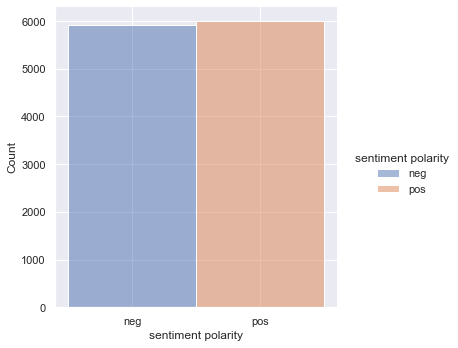

In [35]:
#Task1 Plot Distribution
data = pd.DataFrame(np.array(all_labels),  columns=["sentiment polarity"])
sns.displot(data = data, x="sentiment polarity", hue="sentiment polarity")
sns.set(style="darkgrid", color_codes=True)
plt.show()

#Splitting Data into training and evaluation
train_docs, train_labels, eval_docs, eval_labels = split(0.80,all_docs, all_labels)

#classifier
clf = train_nb(train_docs, train_labels, 1)

# #test
# docs_new = [['this', 'was', 'amazing'], ['this', 'was', 'terrible']]
# predicted = classify_nb(docs_new, clf)
# for x in predicted:
#     print(x)




**Naive Bayes Classifier (with 0.75 smoothing)**


              precision    recall  f1-score   support

         neg       0.84      0.83      0.84      1230
         pos       0.82      0.83      0.83      1153

    accuracy                           0.83      2383
   macro avg       0.83      0.83      0.83      2383
weighted avg       0.83      0.83      0.83      2383



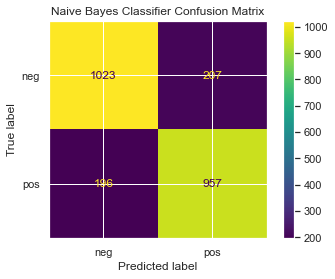


**Base-DT**


              precision    recall  f1-score   support

         neg       0.70      0.69      0.69      1230
         pos       0.67      0.69      0.68      1153

    accuracy                           0.69      2383
   macro avg       0.69      0.69      0.69      2383
weighted avg       0.69      0.69      0.69      2383



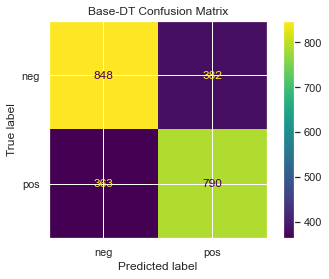


**Best-DT**


              precision    recall  f1-score   support

         neg       0.72      0.69      0.70      1230
         pos       0.68      0.71      0.69      1153

    accuracy                           0.70      2383
   macro avg       0.70      0.70      0.70      2383
weighted avg       0.70      0.70      0.70      2383



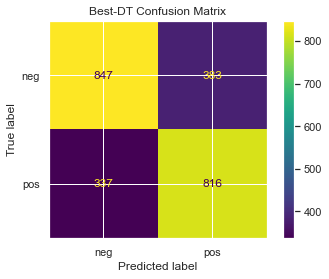

In [63]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# #Task2 A: Naive Bayes Classifier

# #Naive Bayes Classifier with 0.75 smoothing
clf1 = train_nb(train_docs, train_labels, 0.75)
predictions1 = classify_nb(eval_docs,clf1)
print("\n**Naive Bayes Classifier (with 0.75 smoothing)**\n")
print("\n"+classification_report(eval_labels, predictions1, target_names=list(dict.fromkeys(all_labels))))
counts = count_vect.transform(eval_docs)
eval_tfidf = tfidf_transformer.transform(counts)
plot_confusion_matrix(clf1, eval_tfidf , eval_labels)
plt.title("Naive Bayes Classifier Confusion Matrix")
plt.show()


# #Task2 B: Base-DT
clf2 = DecisionTreeClassifier(criterion='entropy')

vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
freqs1 = vectorizer.fit_transform(train_docs)
train_tfidf = tfidf_transformer.fit_transform(freqs1)
clf2.fit(train_tfidf, train_labels)
freqs2 = vectorizer.transform(eval_docs)
eval_tfidf = tfidf_transformer.fit_transform(freqs2)
predictions2 = clf2.predict(eval_tfidf)
print("\n**Base-DT**\n")
print("\n"+classification_report(eval_labels, predictions2, target_names=list(dict.fromkeys(all_labels))))
plot_confusion_matrix(clf2, eval_tfidf , eval_labels) 
plt.title("Base-DT Confusion Matrix")
plt.show()


#Uncomment for Grid Search (comment out the other parts)
# vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# freqs1 = vectorizer.fit_transform(train_docs)
# train_tfidf = tfidf_transformer.fit_transform(freqs1)
# parameters =  {'max_depth':list(range(1,30)), 'max_leaf_nodes':[2,10,50,60,65]}
# clf3 = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=10, cv=3)
# clf3.fit(train_tfidf,train_labels)
# best_fit = clf3.best_estimator_

#DecisionTreeClassifier(max_depth=21, max_leaf_nodes=60, random_state=42)

#Task2 C: Best-DT
#comment out for gridsearch CV
clf3 = DecisionTreeClassifier(max_depth=21, max_leaf_nodes=60)
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
freqs1 = vectorizer.fit_transform(train_docs)
train_tfidf = tfidf_transformer.fit_transform(freqs1)
clf3.fit(train_tfidf, train_labels)

#print("\nBest estimator used for Best-DT : ",best_fit)
freqs2 = vectorizer.transform(eval_docs)
eval_tfidf = tfidf_transformer.fit_transform(freqs2)
predictions3 = clf3.predict(eval_tfidf)
print("\n**Best-DT**\n")
print("\n"+classification_report(eval_labels, predictions3, target_names=list(dict.fromkeys(all_labels))))
plot_confusion_matrix(clf3, eval_tfidf , eval_labels) 
plt.title("Best-DT Confusion Matrix")
plt.show()




In [37]:
#Task 3: Output files 




#Output file for Naive Bayes Model
split_point = int(0.80*len(all_docs))

with open('Naive Bayes Classifier-all_sentiment_shuffled.txt', 'w') as f:
        f.write(f'ROW,\tPREDICTION,\tTARGET\n')
        for x,y in zip(predictions1, eval_labels):
            f.write(f'{split_point}\t{x}\t\t{y}\n')
            split_point+=1
            
        
        f.write("\n**Naive Bayes Classifier (with 0.75 smoothing)**\n")
        f.write("\n"+classification_report(eval_labels, predictions1, target_names=list(dict.fromkeys(all_labels))))
        f.write("\nConfusion Matrix\n\n"+np.array2string(confusion_matrix(eval_labels , predictions1), separator=', '))
        

#Output file for Base-DT Model
split_point = int(0.80*len(all_docs))

with open('Base DT-all_sentiment_shuffled.txt', 'w') as f:
        f.write(f'ROW,\tPREDICTION,\tTARGET\n')
        for x,y in zip(predictions2, eval_labels):
            f.write(f'{split_point}\t{x}\t\t{y}\n')
            split_point+=1
            
        
        f.write("\n**Base-DT**\n")
        f.write("\n"+classification_report(eval_labels, predictions2, target_names=list(dict.fromkeys(all_labels))))
        f.write("\nConfusion Matrix\n\n"+np.array2string(confusion_matrix(eval_labels , predictions2), separator=', '))
        
        
#Output file for Best-DT Model
split_point = int(0.80*len(all_docs))

with open('Best DT-all_sentiment_shuffled.txt', 'w') as f:
        f.write(f'ROW,\tPREDICTION,\tTARGET\n')
        for x,y in zip(predictions3, eval_labels):
            f.write(f'{split_point}\t{x}\t\t{y}\n')
            split_point+=1
            
        
        f.write("\n**Best-DT**\n")
        f.write("\n"+classification_report(eval_labels, predictions3, target_names=list(dict.fromkeys(all_labels))))
        f.write("\nConfusion Matrix\n\n"+np.array2string(confusion_matrix(eval_labels , predictions3), separator=', '))
    
        
    


In [58]:
#Why were they hard to classifiy?




#Task 4: Error Analysis Naive Bayes
split_point = int(0.80*len(all_docs))
misclassified = []
print("Misclassified documents from Naive Bayes Classification\n")
for i,j in zip(predictions1,eval_labels):
    if i!=j :
        misclassified.append(split_point)
        print(f'{split_point}: {j} => {i} : {" ".join(all_docs[split_point])}\n')
    split_point+=1
print("Number of misclassified: ",len(misclassified))




Misclassified documents from Naive Bayes Classification

9540: neg => pos : i agree with other reviewers that it feels good and does n't smell too much , however , i 've experimented with it several times to confirm my findings , and it turns out to give me really bad blackheads . i 'm 25 with an oily t-zone and very dry facial skin . on mornings after using this cream , i have nasty blackheads on my forehead and chin . there are better products out there

9541: neg => pos : this camera has a very poor lens . at 1x zoom , the barrel / spherical distortion is enormous ; try taking a picture of a tiled wall . image quality is also so-so when a picture is viewed at 100% ; scaled down on a computer monitor , the quality is ok . color fidelity is next to nothing when using flash and auto white balance . [...]

9543: neg => pos : this book offers more information about santa claus than it does the gods / godesses associated with the winter soltice . the craft projects are cheesey and the rec

In [59]:
#Task 4: Error Analysis Base-DT
split_point = int(0.80*len(all_docs))
misclassified = []
print("Misclassified documents from Best DT Classification\n")
for i,j in zip(predictions2,eval_labels):
    if i!=j :
       misclassified.append(split_point)
       print(f'{split_point}: {j} => {i} : {" ".join(all_docs[split_point])}\n')
    split_point+=1

print("Number of misclassified: ",len(misclassified))

Misclassified documents from Best DT Classification  0 

9536: neg => pos : everyone uses office . everyone is familiar with office . so why did ms change the interface to make it nearly impossible to get anything done ? i am computer savy ( i 'm an engineer ) and i find the new ribbon interface totally infuriating . worst of all there is no way to go back to the " old " drop down menu system . it honestly takes me 10x the time to get anything done with word / powerpoint because they 've buried functionality behind these ridiculous ribbons . ms claims that you will be able to be much more productive once you 're familiar with the ribbons . i do n't know / care whether that 's true or not . the learning curve to get to the point of fluency with their new ui is immense . so much so that the time investment to become proficient far far far out ways any " increase " in productivity....not to mention that it 's overpriced . offce 2003 is a far superior product

9538: neg => pos : i am ratin

In [64]:
#Task 4: Error Analysis Best-DT
split_point = int(0.80*len(all_docs))
misclassified = []
print("Misclassified documents from Base DT Classification\n")
for i,j in zip(predictions3,eval_labels):
    if i!=j :
       misclassified.append(split_point)
       print(f'{split_point}: {j} => {i} : {" ".join(all_docs[split_point])}\n')
    split_point+=1

print("Number of misclassified: ",len(misclassified))

Misclassified documents from Best DT Classification

9532: pos => neg : the series just keeps on getting better . the bob newhart show was one of the best comedies ever on television . the other funny show was " newhart " , which i cannot understand why it has not been released on dvd . the whole cast just clicks . i wish shows like this were still on television . if you enjoy a good laugh then buy this and the other sets !

9538: neg => pos : i am rating this program just one star because i found out after ordering that it is not compatible with digital voice recorders . i did go to the nuance website before ordering . they did n't have a little chart to tell what the difference was between preferred and standard . anyway , if you want naturally speaking to do transcribing , you need the preferred version , not this one .

9541: neg => pos : this camera has a very poor lens . at 1x zoom , the barrel / spherical distortion is enormous ; try taking a picture of a tiled wall . image qual